<a href="https://colab.research.google.com/github/zeguii/project-data/blob/main/ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/iFood.xlsx')

print('   ---PRIMEIRAS 5 LINHAS---')
print(df.head())
print('\n')

print('   ---INFORMAÇÕES GERAIS---')
df.info()
print('\n')

print('   ---VERIFICAÇÃO DE NULOS---')
print(df.isnull().sum())
print('\n')

print('   ---VERIFICAÇÃO DE LINHAS DUPLICADAS---')
num_duplicadas = df.duplicated().sum()
print(f'Número de linhas duplicadas: {num_duplicadas}')
print('\n')

nome_coluna_data = 'Customer_Days'
df[nome_coluna_data] = pd.to_datetime(df[nome_coluna_data])
print(f"-> Coluna '{nome_coluna_data}' convertida para o formato datetime.")
print('\n')

print("\n\n--- Verificando o DataFrame após a limpeza ---")
df.info()
print('\n')

colunas_gasto = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Gasto_Total'] = df[colunas_gasto].sum(axis=1)

df['Total_Filhos'] = df['Kidhome'] + df['Teenhome']
colunas_para_verificar = ['Age', 'Kidhome', 'Teenhome', 'Total_Filhos', 'Gasto_Total']
print(df[colunas_para_verificar].head())


   ---PRIMEIRAS 5 LINHAS---
   Index  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0   1001   58138        0         0       58       635         88   
1   1002   46344        1         1       38        11          1   
2   1003   71613        0         0       26       426         49   
3   1004   26646        1         0       26        11          4   
4   1005   58293        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   
3               20               10                 3  ...             0   
4              118               46                27  ...             0   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmpOverall  Complain  \
0             0        

--- Iniciando a Análise de Perfil do Cliente ---


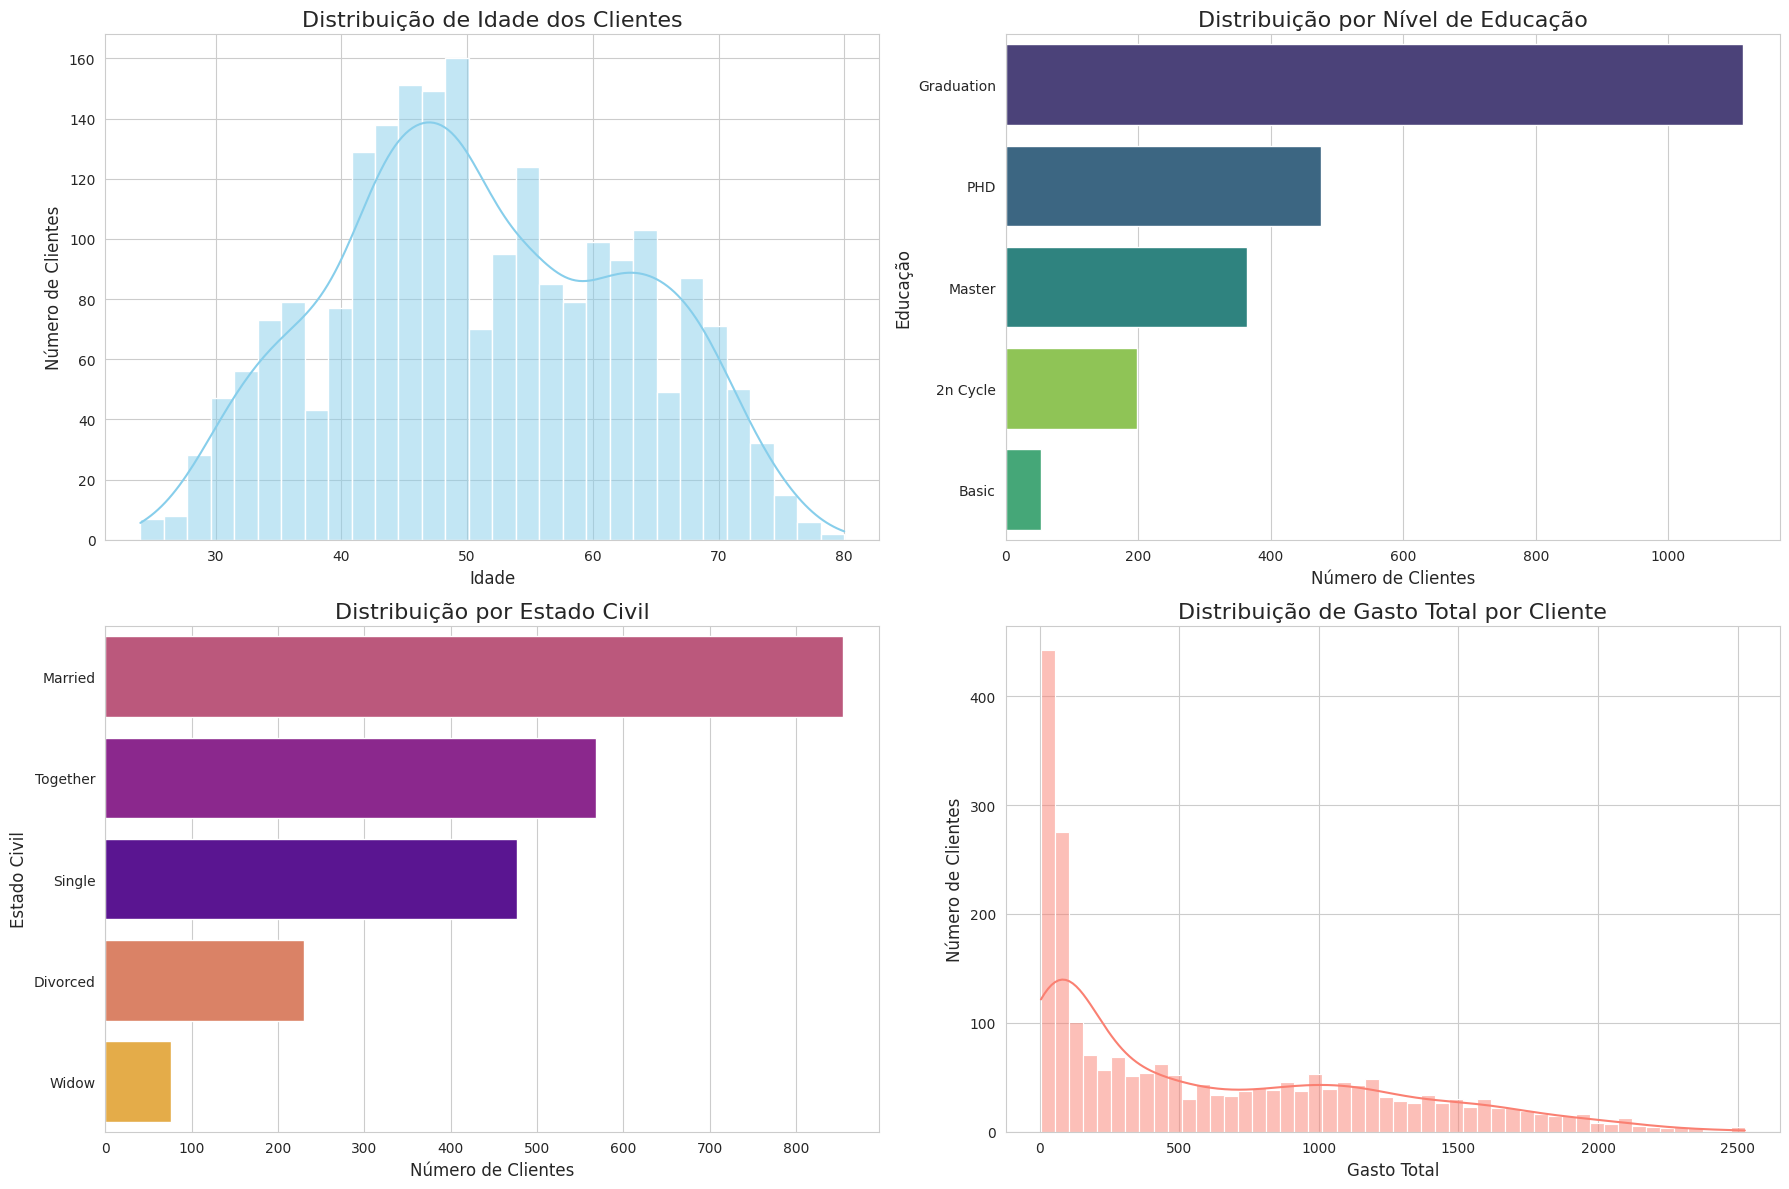

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Iniciando a Análise de Perfil do Cliente ---")

sns.set_style('whitegrid')
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Distribuição de Idade dos Clientes', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)


plt.subplot(2, 2, 2)
sns.countplot(y=df['education'], palette='viridis', order=df['education'].value_counts().index, hue=df['education'], legend=False)
plt.title('Distribuição por Nível de Educação', fontsize=16)
plt.xlabel('Número de Clientes', fontsize=12)
plt.ylabel('Educação', fontsize=12)


plt.subplot(2, 2, 3)
sns.countplot(y=df['marital_status'], palette='plasma', order=df['marital_status'].value_counts().index, hue=df['marital_status'], legend=False)
plt.title('Distribuição por Estado Civil', fontsize=16)
plt.xlabel('Número de Clientes', fontsize=12)
plt.ylabel('Estado Civil', fontsize=12)


plt.subplot(2, 2, 4)
sns.histplot(df['Gasto_Total'], kde=True, bins=50, color='salmon')
plt.title('Distribuição de Gasto Total por Cliente', fontsize=16)
plt.xlabel('Gasto Total', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)


plt.tight_layout()
plt.show()